# Song feature analysis

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster as skc
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
import mlxtend as mlx
import mlxtend.preprocessing as mlp
import mlxtend.frequent_patterns as FP

## Preprocesamiento

In [142]:
df=pd.read_csv('data/song-features.csv')
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,duration_ms,time_signature,song_name,artist(s),gender(of the atrist(s)),"type(solo, colab, grpup/band)",country,number_integrants,song_language,label
0,0.488,0.493,7,-7.870,1,0.0342,0.17400,0.000002,0.3530,0.399,...,247920,4,Held Down,['Laura Marling'],F,solo,England,1,English,F
1,0.695,0.847,8,-5.539,1,0.0485,0.44700,0.071000,0.2160,0.825,...,179987,4,Blank Slate,['Chicano Batman'],M,band,United States,1,English,F
2,0.619,0.719,0,-4.111,1,0.1570,0.02270,0.000000,0.0839,0.351,...,194576,4,Back Home (feat. Summer Walker),"['Trey Songz', 'Summer Walker']",V,colab,United States,2,English,F
3,0.226,0.594,7,-5.046,1,0.0425,0.03590,0.005030,0.1620,0.175,...,293600,4,Ohio,['King Princess'],F,solo,United States,1,English,F
4,0.636,0.763,2,-8.099,1,0.0441,0.13500,0.107000,0.0595,0.320,...,179040,4,Cellular,['King Krule'],M,solo,England,1,English,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.787,0.705,0,-7.582,1,0.0695,0.13700,0.000001,0.1080,0.499,...,188654,4,Cuando Perriabas,['Bad Bunny'],M,solo,Puerto Rico,1,Spanish,RF
997,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,...,203064,4,Levitating (feat. DaBaby),"['Dua Lipa', 'DaBaby']",V,colab,UK,2,English,RF
998,0.547,0.789,8,-5.619,1,0.0420,0.00871,0.000000,0.1000,0.345,...,193911,4,When We Were Young,"['Lost Kings', 'Norma Jean Martine']",V,colab,United States,2,English,R
999,0.499,0.792,4,-4.380,1,0.0710,0.01310,0.000505,0.1100,0.341,...,242750,4,Serenity,"['Chamsi', 'AJ Euro']",V,colab,-,2,English,R


In [143]:
columns_to_delete=['id','uri','type','track_href','analysis_url']
df.drop(columns_to_delete, inplace=True, axis=1)

In [144]:
song_name=df['song_name']
artists=df['artist(s)']

In [145]:
df.drop('artist(s)', inplace=True, axis=1)
df.drop('song_name', inplace=True, axis=1)

In [146]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,gender(of the atrist(s)),"type(solo, colab, grpup/band)",country,number_integrants,song_language,label
0,0.488,0.493,7,-7.870,1,0.0342,0.17400,0.000002,0.3530,0.399,79.442,247920,4,F,solo,England,1,English,F
1,0.695,0.847,8,-5.539,1,0.0485,0.44700,0.071000,0.2160,0.825,116.092,179987,4,M,band,United States,1,English,F
2,0.619,0.719,0,-4.111,1,0.1570,0.02270,0.000000,0.0839,0.351,86.036,194576,4,V,colab,United States,2,English,F
3,0.226,0.594,7,-5.046,1,0.0425,0.03590,0.005030,0.1620,0.175,87.500,293600,4,F,solo,United States,1,English,F
4,0.636,0.763,2,-8.099,1,0.0441,0.13500,0.107000,0.0595,0.320,132.666,179040,4,M,solo,England,1,English,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.787,0.705,0,-7.582,1,0.0695,0.13700,0.000001,0.1080,0.499,81.998,188654,4,M,solo,Puerto Rico,1,Spanish,RF
997,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,203064,4,V,colab,UK,2,English,RF
998,0.547,0.789,8,-5.619,1,0.0420,0.00871,0.000000,0.1000,0.345,129.916,193911,4,V,colab,United States,2,English,R
999,0.499,0.792,4,-4.380,1,0.0710,0.01310,0.000505,0.1100,0.341,159.946,242750,4,V,colab,-,2,English,R


In [147]:
countries=df['country'].unique()
dic_country = {key: i+1 for i,key in enumerate(countries)}
dic_country

{'England': 1,
 'United States': 2,
 'Canada': 3,
 'Spain': 4,
 'France': 5,
 'Chile': 6,
 'Puerto Rico': 7,
 'Argentina': 8,
 'Mexico': 9,
 'Colombia': 10,
 'Peru': 11,
 'Norway': 12,
 'Germany': 13,
 'Japan': 14,
 'Australia': 15,
 'Sweden': 16,
 'Nigeria': 17,
 'Malaysia': 18,
 'Korea': 19,
 'Venezuela': 20,
 '-': 21,
 'Panama': 22,
 'Ireland': 23,
 'Zimbawe': 24,
 'Switzerland': 25,
 'New Zeland': 26,
 'Sudan': 27,
 'Dominican Republic': 28,
 'Belarus': 29,
 'Iran': 30,
 'Italy': 31,
 'Cuba': 32,
 'Mali': 33,
 'Netherlands': 34,
 'UK': 35,
 'Yugoslavia': 36,
 'South Africa': 37,
 'Israel': 38,
 'Denmark': 39,
 'Rusia': 40,
 'Brazil': 41,
 'Poland': 42,
 'Belgium': 43,
 'Greece': 44}

In [148]:
df['country'].replace(dic_country,inplace=True)

In [149]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,gender(of the atrist(s)),"type(solo, colab, grpup/band)",country,number_integrants,song_language,label
0,0.488,0.493,7,-7.870,1,0.0342,0.17400,0.000002,0.3530,0.399,79.442,247920,4,F,solo,1,1,English,F
1,0.695,0.847,8,-5.539,1,0.0485,0.44700,0.071000,0.2160,0.825,116.092,179987,4,M,band,2,1,English,F
2,0.619,0.719,0,-4.111,1,0.1570,0.02270,0.000000,0.0839,0.351,86.036,194576,4,V,colab,2,2,English,F
3,0.226,0.594,7,-5.046,1,0.0425,0.03590,0.005030,0.1620,0.175,87.500,293600,4,F,solo,2,1,English,F
4,0.636,0.763,2,-8.099,1,0.0441,0.13500,0.107000,0.0595,0.320,132.666,179040,4,M,solo,1,1,English,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.787,0.705,0,-7.582,1,0.0695,0.13700,0.000001,0.1080,0.499,81.998,188654,4,M,solo,7,1,Spanish,RF
997,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,203064,4,V,colab,35,2,English,RF
998,0.547,0.789,8,-5.619,1,0.0420,0.00871,0.000000,0.1000,0.345,129.916,193911,4,V,colab,2,2,English,R
999,0.499,0.792,4,-4.380,1,0.0710,0.01310,0.000505,0.1100,0.341,159.946,242750,4,V,colab,21,2,English,R


In [150]:
typee = df['type(solo, colab, grpup/band)'].unique()
dic_type = {key: i+1 for i,key in enumerate(typee)}
dic_type

{'solo': 1, 'band': 2, 'colab': 3, 'band-colab': 4}

In [151]:
df['type(solo, colab, grpup/band)'].replace(dic_type,inplace=True)

In [152]:
gender = df['gender(of the atrist(s))'].unique()
dic_gen = {key: i+1 for i,key in enumerate(gender)}
dic_gen

{'F': 1, 'M': 2, 'V': 3, 'T': 4, '-': 5}

In [123]:
df['gender(of the atrist(s))'].replace(dic_gen,inplace=True)

In [153]:
language = df['song_language'].unique()
dic_lan = {key: i+1 for i,key in enumerate(language)}
dic_lan

{'English': 1,
 'Spanish': 2,
 'French': 3,
 'English-Italian': 4,
 'English-Korean': 5,
 'No/Lang': 6,
 'English-Spanish': 7,
 'Korean': 8,
 'English-French': 9,
 'Korea': 10,
 'Russian': 11,
 nan: 12,
 'Portuguese-Spanish': 13,
 'French-Spanish': 14}

In [154]:
df['song_language'].replace(dic_lan,inplace=True)

In [155]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,gender(of the atrist(s)),"type(solo, colab, grpup/band)",country,number_integrants,song_language,label
0,0.488,0.493,7,-7.870,1,0.0342,0.17400,0.000002,0.3530,0.399,79.442,247920,4,F,1,1,1,1,F
1,0.695,0.847,8,-5.539,1,0.0485,0.44700,0.071000,0.2160,0.825,116.092,179987,4,M,2,2,1,1,F
2,0.619,0.719,0,-4.111,1,0.1570,0.02270,0.000000,0.0839,0.351,86.036,194576,4,V,3,2,2,1,F
3,0.226,0.594,7,-5.046,1,0.0425,0.03590,0.005030,0.1620,0.175,87.500,293600,4,F,1,2,1,1,F
4,0.636,0.763,2,-8.099,1,0.0441,0.13500,0.107000,0.0595,0.320,132.666,179040,4,M,1,1,1,1,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.787,0.705,0,-7.582,1,0.0695,0.13700,0.000001,0.1080,0.499,81.998,188654,4,M,1,7,1,2,RF
997,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,203064,4,V,3,35,2,1,RF
998,0.547,0.789,8,-5.619,1,0.0420,0.00871,0.000000,0.1000,0.345,129.916,193911,4,V,3,2,2,1,R
999,0.499,0.792,4,-4.380,1,0.0710,0.01310,0.000505,0.1100,0.341,159.946,242750,4,V,3,21,2,1,R


In [156]:
like = df['label'].unique()
dic_likes = {key: i+1 for i,key in enumerate(like)}
dic_likes

{'F': 1, 'FR': 2, 'RF': 3, 'R': 4}

In [157]:
dic_likes['RF'] = 2
dic_likes['R'] = 3
dic_likes


{'F': 1, 'FR': 2, 'RF': 2, 'R': 3}

In [158]:
df['label'].replace(dic_likes,inplace=True)

In [159]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,gender(of the atrist(s)),"type(solo, colab, grpup/band)",country,number_integrants,song_language,label
0,0.488,0.493,7,-7.870,1,0.0342,0.17400,0.000002,0.3530,0.399,79.442,247920,4,F,1,1,1,1,1
1,0.695,0.847,8,-5.539,1,0.0485,0.44700,0.071000,0.2160,0.825,116.092,179987,4,M,2,2,1,1,1
2,0.619,0.719,0,-4.111,1,0.1570,0.02270,0.000000,0.0839,0.351,86.036,194576,4,V,3,2,2,1,1
3,0.226,0.594,7,-5.046,1,0.0425,0.03590,0.005030,0.1620,0.175,87.500,293600,4,F,1,2,1,1,1
4,0.636,0.763,2,-8.099,1,0.0441,0.13500,0.107000,0.0595,0.320,132.666,179040,4,M,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.787,0.705,0,-7.582,1,0.0695,0.13700,0.000001,0.1080,0.499,81.998,188654,4,M,1,7,1,2,2
997,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,203064,4,V,3,35,2,1,2
998,0.547,0.789,8,-5.619,1,0.0420,0.00871,0.000000,0.1000,0.345,129.916,193911,4,V,3,2,2,1,3
999,0.499,0.792,4,-4.380,1,0.0710,0.01310,0.000505,0.1100,0.341,159.946,242750,4,V,3,21,2,1,3


## Clustering kmeans

In [52]:
#Separamos los datos en las canciones que les gustan a cada uno y a ambos
fer_songs = df[(df.label == 1) | (df.label == 2)]
rafa_songs = df[(df.label == 3) | (df.label == 2)]
both_songs = df[(df.label == 2)]

### Cluster de Fer

In [54]:
fer_songs.drop('label', inplace=True, axis=1)
numpy_data_fer = pd.DataFrame(fer_songs).to_numpy()
numpy_data_fer.shape

(630, 18)

In [43]:
RSS=[]
resultado = skc.KMeans(n_clusters=9,init='random',max_iter=200).fit(data2numpy)
r=resultado.inertia_
RSS.append(r)

In [46]:
# Esto me da error
t = np.arange(1, 10, 1)
plt.plot(t, RSS , 'g')
plt.xlabel('Number of clusters')
plt.ylabel('RSS')
plt.grid()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (9,) and (1,)

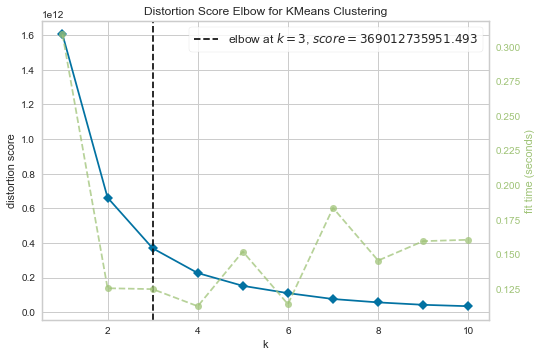

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 k=None, model=None)

In [55]:
X, y = numpy_data_fer,1
kelbow_visualizer(KMeans(random_state=4), X, k=(1,11))

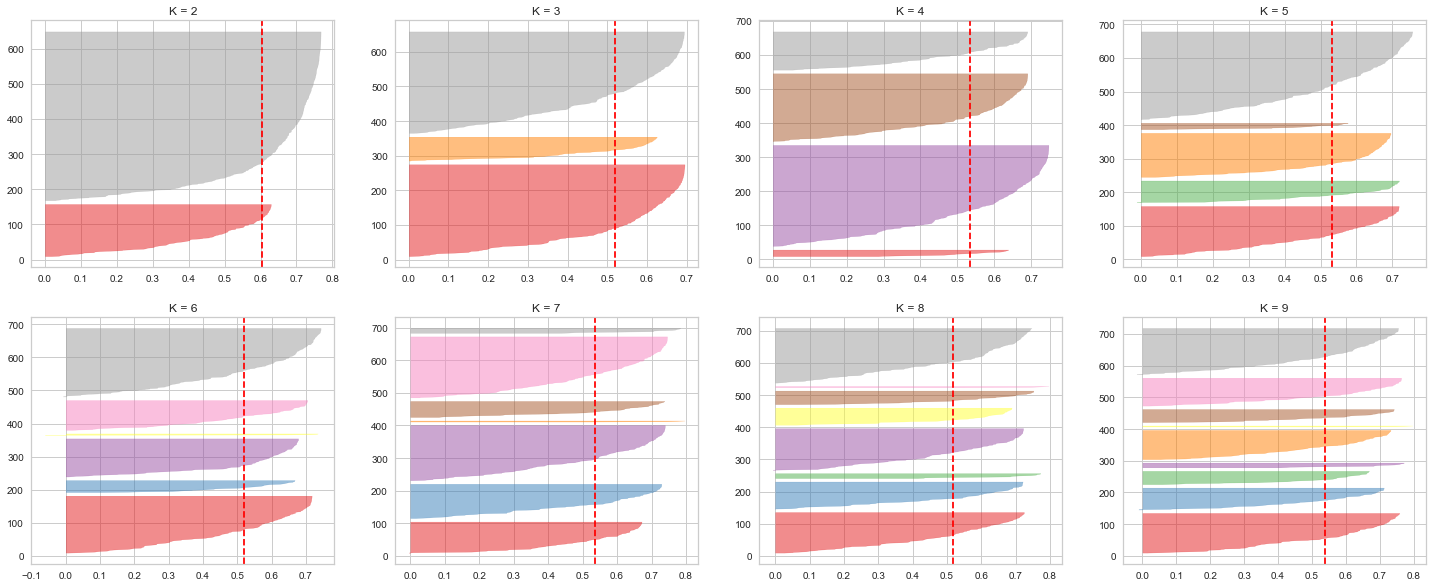

In [56]:
fig, axs = plt.subplots(2, 4, figsize=(25,10))

j = 0
k = 0
k_model = 2
for i in range(8):
    model = KMeans(k_model)
    visualizer = SilhouetteVisualizer(model, ax = axs[k,j])
    visualizer.fit(numpy_data_fer)  
    axs[k,j].set_title("K = " + str(k_model))
    k_model = k_model + 1
    j = j + 1
    if j == 4:
        k = k + 1
        j = 0
plt.show()   

In [57]:
results = KMeans(n_clusters=4,init='random',max_iter=200).fit(numpy_data_fer)
r = results.cluster_centers_

In [58]:
r.shape

(4, 18)

In [61]:
fer_songs

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,gender(of the atrist(s)),"type(solo, colab, grpup/band)",country,number_integrants,song_language
0,0.488,0.493,7,-7.870,1,0.0342,0.17400,0.000002,0.3530,0.3990,79.442,247920,4,1,1,1,1,1
1,0.695,0.847,8,-5.539,1,0.0485,0.44700,0.071000,0.2160,0.8250,116.092,179987,4,2,2,2,1,1
2,0.619,0.719,0,-4.111,1,0.1570,0.02270,0.000000,0.0839,0.3510,86.036,194576,4,3,3,2,2,1
3,0.226,0.594,7,-5.046,1,0.0425,0.03590,0.005030,0.1620,0.1750,87.500,293600,4,1,1,2,1,1
4,0.636,0.763,2,-8.099,1,0.0441,0.13500,0.107000,0.0595,0.3200,132.666,179040,4,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,0.760,0.886,9,-5.356,0,0.0258,0.02190,0.000007,0.6230,0.7800,123.002,189399,4,3,3,13,2,1
981,0.764,0.725,7,-8.812,1,0.0576,0.46300,0.000006,0.1090,0.0794,100.063,177653,4,2,1,2,1,1
985,0.729,0.805,6,-3.830,1,0.1840,0.19000,0.225000,0.0909,0.3450,191.994,225373,4,1,1,2,1,2
996,0.787,0.705,0,-7.582,1,0.0695,0.13700,0.000001,0.1080,0.4990,81.998,188654,4,2,1,7,1,2


In [59]:
r[0], r[1], r[2], r[3]

(array([ 6.08043860e-01,  6.63605263e-01,  4.71929825e+00, -6.81596491e+00,
         6.05263158e-01,  7.39552632e-02,  1.81196833e-01,  8.55028610e-02,
         1.73852632e-01,  5.11536842e-01,  1.15731272e+02,  2.68479360e+05,
         3.97368421e+00,  1.92982456e+00,  1.93859649e+00,  5.61403509e+00,
         1.61403509e+00,  1.42105263e+00]),
 array([ 6.83010135e-01,  6.54868243e-01,  5.56756757e+00, -6.55216216e+00,
         4.89864865e-01,  9.26695946e-02,  1.97081961e-01,  4.58922389e-02,
         1.82891554e-01,  4.95752365e-01,  1.21346970e+02,  2.08177622e+05,
         3.96959459e+00,  1.84121622e+00,  1.84459459e+00,  6.32432432e+00,
         1.45608108e+00,  1.49324324e+00]),
 array([ 7.10050000e-01,  6.62185000e-01,  5.36500000e+00, -6.22456000e+00,
         6.05000000e-01,  1.24086000e-01,  2.12625890e-01,  5.42245564e-02,
         1.90233500e-01,  5.27908000e-01,  1.23394300e+02,  1.62579565e+05,
         3.98000000e+00,  1.69000000e+00,  1.70500000e+00,  5.72000000e+00,


In [67]:
cols = fer_songs.columns
for centroid in zip(r[0], r[1], r[2], r[3], cols):
    print(centroid[4])
    print('cluster1 = ', centroid[0])
    print('cluster2 = ', centroid[1])
    print('cluster3 = ', centroid[2])
    print('cluster4 = ', centroid[3])
    print('\n')
    

danceability
cluster1 =  0.6080438596491228
cluster2 =  0.6830101351351351
cluster3 =  0.71005
cluster4 =  0.61675


energy
cluster1 =  0.6636052631578947
cluster2 =  0.6548682432432432
cluster3 =  0.662185
cluster4 =  0.59835


key
cluster1 =  4.719298245614036
cluster2 =  5.567567567567568
cluster3 =  5.365
cluster4 =  6.15


loudness
cluster1 =  -6.815964912280702
cluster2 =  -6.552162162162162
cluster3 =  -6.22456
cluster4 =  -8.3503


mode
cluster1 =  0.605263157894737
cluster2 =  0.48986486486486497
cluster3 =  0.605
cluster4 =  0.5


speechiness
cluster1 =  0.07395526315789473
cluster2 =  0.09266959459459459
cluster3 =  0.124086
cluster4 =  0.09366


acousticness
cluster1 =  0.18119683333333333
cluster2 =  0.1970819608108108
cluster3 =  0.21262589
cluster4 =  0.24039634799999998


instrumentalness
cluster1 =  0.08550286096491228
cluster2 =  0.04589223888513513
cluster3 =  0.0542245564
cluster4 =  0.1840565


liveness
cluster1 =  0.17385263157894737
cluster2 =  0.1828915540540540

### Cluster de Rafa

In [70]:
# rafa_songs.drop('label', inplace=True, axis=1)
numpy_data_rafa = pd.DataFrame(rafa_songs).to_numpy()
numpy_data_rafa.shape

(708, 18)

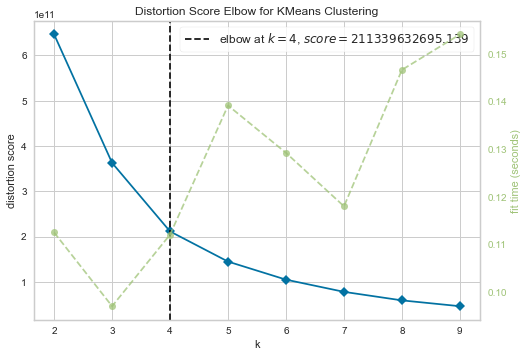

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [76]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(numpy_data_rafa)  
visualizer.poof()  

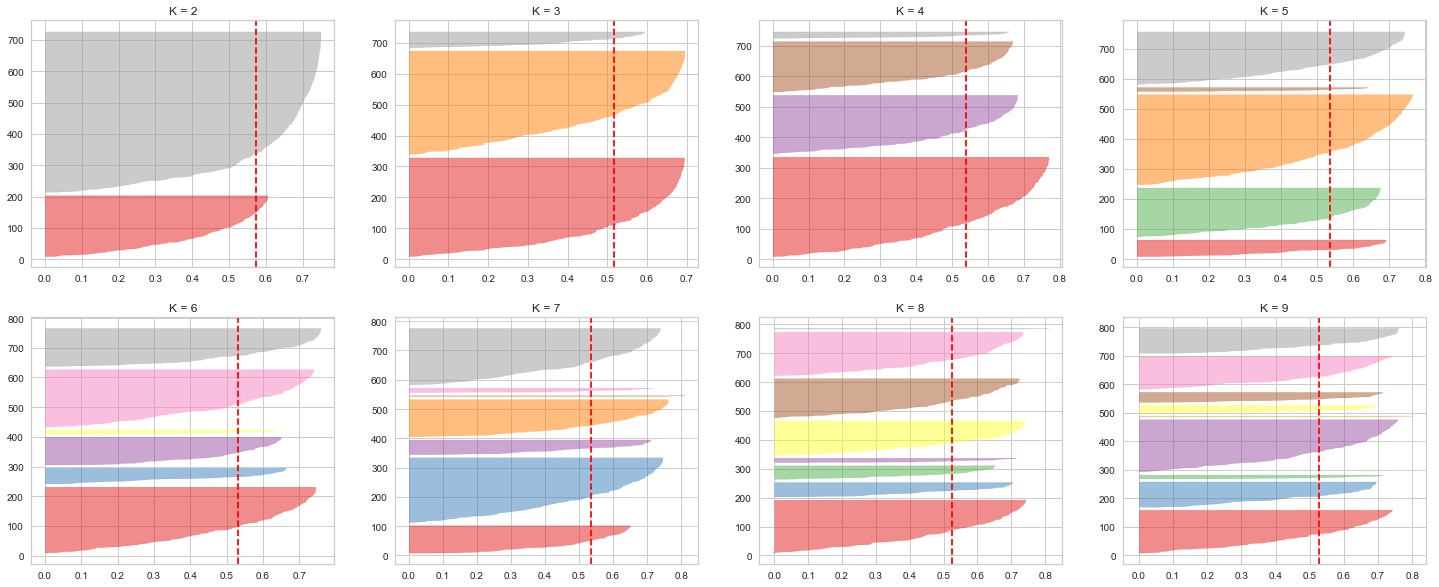

In [77]:
fig, axs = plt.subplots(2, 4, figsize=(25,10))

j = 0
k = 0
k_model = 2
for i in range(8):
    model = KMeans(k_model)
    visualizer = SilhouetteVisualizer(model, ax = axs[k,j])
    visualizer.fit(numpy_data_rafa)  
    axs[k,j].set_title("K = " + str(k_model))
    k_model = k_model + 1
    j = j + 1
    if j == 4:
        k = k + 1
        j = 0
plt.show()   

In [79]:
results = KMeans(n_clusters=4,init='random',max_iter=200).fit(numpy_data_rafa)
r = results.cluster_centers_
r.shape

(4, 18)

In [80]:
cols = rafa_songs.columns
for centroid in zip(r[0], r[1], r[2], r[3], cols):
    print(centroid[4])
    print('cluster1 = ', centroid[0])
    print('cluster2 = ', centroid[1])
    print('cluster3 = ', centroid[2])
    print('cluster4 = ', centroid[3])
    print('\n')

danceability
cluster1 =  0.6512958579881657
cluster2 =  0.705
cluster3 =  0.6977926829268293
cluster4 =  0.6647692307692308


energy
cluster1 =  0.6929289940828403
cluster2 =  0.6856
cluster3 =  0.7073048780487805
cluster4 =  0.6834615384615385


key
cluster1 =  4.828402366863906
cluster2 =  5.448648648648649
cluster3 =  5.652439024390244
cluster4 =  5.5


loudness
cluster1 =  -6.011615384615385
cluster2 =  -5.887508108108109
cluster3 =  -5.5368963414634145
cluster4 =  -6.4804615384615385


mode
cluster1 =  0.5976331360946746
cluster2 =  0.5621621621621622
cluster3 =  0.5640243902439025
cluster4 =  0.46153846153846156


speechiness
cluster1 =  0.09827928994082841
cluster2 =  0.11925243243243244
cluster3 =  0.091275
cluster4 =  0.10911538461538461


acousticness
cluster1 =  0.1929346923076923
cluster2 =  0.1910703027027027
cluster3 =  0.1698320469512195
cluster4 =  0.19010103692307692


instrumentalness
cluster1 =  0.060512976863905325
cluster2 =  0.030742104540540532
cluster3 =  0.0473

### Cluster de ambos

In [81]:
both_songs.drop('label', inplace=True, axis=1)
numpy_data_both = pd.DataFrame(both_songs).to_numpy()
numpy_data_both.shape

(337, 18)

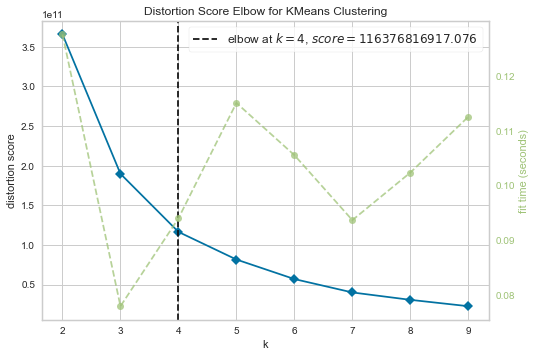

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [82]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(numpy_data_both)  
visualizer.poof()  

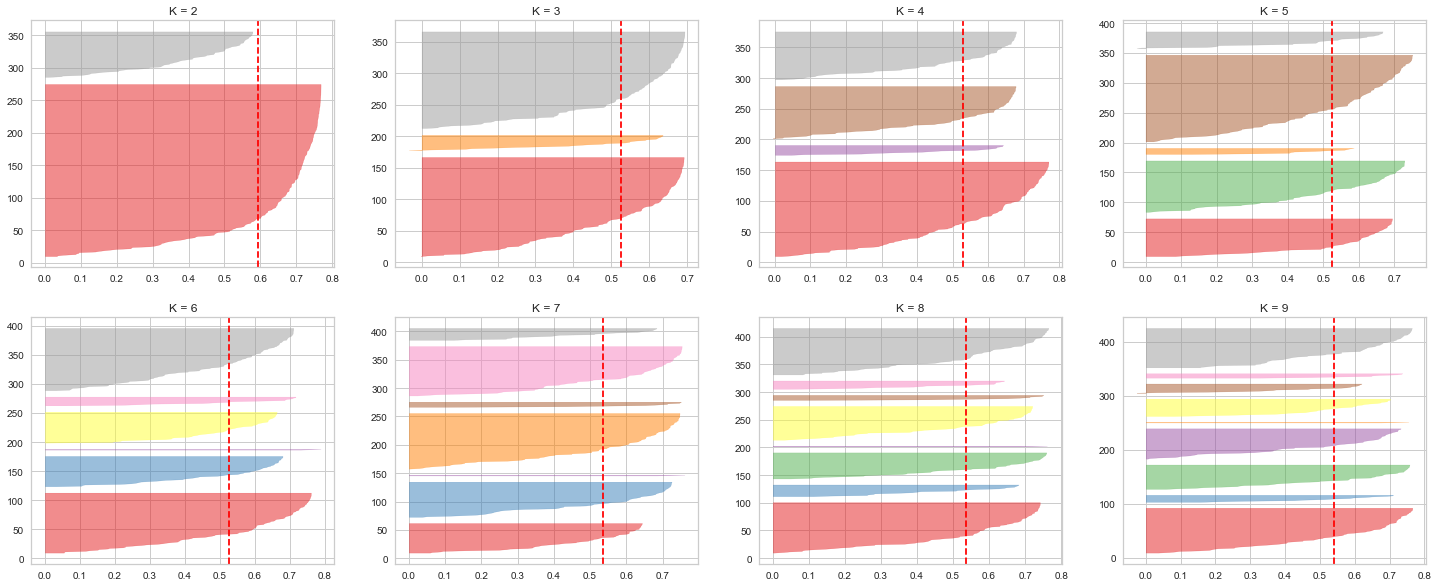

In [83]:
fig, axs = plt.subplots(2, 4, figsize=(25,10))

j = 0
k = 0
k_model = 2
for i in range(8):
    model = KMeans(k_model)
    visualizer = SilhouetteVisualizer(model, ax = axs[k,j])
    visualizer.fit(numpy_data_both)  
    axs[k,j].set_title("K = " + str(k_model))
    k_model = k_model + 1
    j = j + 1
    if j == 4:
        k = k + 1
        j = 0
plt.show() 

In [84]:
results = KMeans(n_clusters=4,init='random',max_iter=200).fit(numpy_data_both)
r = results.cluster_centers_
r.shape

(4, 18)

In [85]:
cols = both_songs.columns
for centroid in zip(r[0], r[1], r[2], r[3], cols):
    print(centroid[4])
    print('cluster1 = ', centroid[0])
    print('cluster2 = ', centroid[1])
    print('cluster3 = ', centroid[2])
    print('cluster4 = ', centroid[3])
    print('\n')

danceability
cluster1 =  0.6847529411764706
cluster2 =  0.7224596273291926
cluster3 =  0.6412222222222222
cluster4 =  0.7183150684931507


energy
cluster1 =  0.6741294117647059
cluster2 =  0.6831180124223603
cluster3 =  0.6663333333333333
cluster4 =  0.6541506849315069


key
cluster1 =  4.9529411764705875
cluster2 =  6.186335403726708
cluster3 =  5.833333333333333
cluster4 =  5.506849315068493


loudness
cluster1 =  -6.561176470588236
cluster2 =  -5.794670807453416
cluster3 =  -6.847833333333334
cluster4 =  -6.221808219178082


mode
cluster1 =  0.49411764705882344
cluster2 =  0.5527950310559006
cluster3 =  0.5555555555555556
cluster4 =  0.5342465753424658


speechiness
cluster1 =  0.09380470588235294
cluster2 =  0.09656273291925466
cluster3 =  0.11032777777777777
cluster4 =  0.15283972602739726


acousticness
cluster1 =  0.18918727058823528
cluster2 =  0.1836276298136646
cluster3 =  0.21139927555555557
cluster4 =  0.20185945205479452


instrumentalness
cluster1 =  0.05779059776470588
c

## Patrones Frecuentes

In [108]:
# cont = min(df.time_signature)
# for _ in range(3):
#     cont += (max(df.time_signature) - min(df.time_signature))/3
#     print(cont)

df.time_signature

0       4
1       4
2       4
3       4
4       4
       ..
996     4
997     4
998     4
999     4
1000    4
Name: time_signature, Length: 1001, dtype: int64

In [160]:
df.loc[df['acousticness'] < 0.5, 'acousticness'] = 0
df.loc[df['acousticness'] >= 0.5, 'acousticness'] = 1

df.loc[df['danceability'] <= 0.1, 'danceability'] = 0
df.loc[(df['danceability'] > 0.1) & (df['danceability'] <= 0.2), 'danceability'] = 1
df.loc[(df['danceability'] > 0.2) & (df['danceability'] <= 0.3), 'danceability'] = 2
df.loc[(df['danceability'] > 0.3) & (df['danceability'] <= 0.4), 'danceability'] = 3
df.loc[(df['danceability'] > 0.4) & (df['danceability'] <= 0.5), 'danceability'] = 4
df.loc[(df['danceability'] > 0.5) & (df['danceability'] <= 0.6), 'danceability'] = 5
df.loc[(df['danceability'] > 0.6) & (df['danceability'] <= 0.7), 'danceability'] = 6
df.loc[(df['danceability'] > 0.7) & (df['danceability'] <= 0.8), 'danceability'] = 7
df.loc[(df['danceability'] > 0.8) & (df['danceability'] <= 0.9), 'danceability'] = 8
df.loc[(df['danceability'] > 0.9) & (df['danceability'] < 1.0), 'danceability'] = 9

df.loc[(df['duration_ms'] > 0) & (df['duration_ms'] <= 60000), 'duration_ms'] = 0
df.loc[(df['duration_ms'] > 60000) & (df['duration_ms'] <= 120000), 'duration_ms'] = 1
df.loc[(df['duration_ms'] > 120000) & (df['duration_ms'] <= 180000), 'duration_ms'] = 2
df.loc[(df['duration_ms'] > 180000) & (df['duration_ms'] <= 240000), 'duration_ms'] = 3
df.loc[(df['duration_ms'] > 240000) & (df['duration_ms'] <= 300000), 'duration_ms'] = 4
df.loc[(df['duration_ms'] > 300000) & (df['duration_ms'] <= 360000), 'duration_ms'] = 5
df.loc[(df['duration_ms'] > 360000) & (df['duration_ms'] <= 420000), 'duration_ms'] = 6
df.loc[(df['duration_ms'] > 420000) & (df['duration_ms'] <= 480000), 'duration_ms'] = 7
df.loc[(df['duration_ms'] > 480000) & (df['duration_ms'] <= 540000), 'duration_ms'] = 8
df.loc[(df['duration_ms'] > 540000) & (df['duration_ms'] <= 600000), 'duration_ms'] = 9

df.loc[(df['energy'] > 0.0) & (df['energy'] <= 0.1), 'energy'] = 0
df.loc[(df['energy'] > 0.1) & (df['energy'] <= 0.2), 'energy'] = 1
df.loc[(df['energy'] > 0.2) & (df['energy'] <= 0.3), 'energy'] = 2
df.loc[(df['energy'] > 0.3) & (df['energy'] <= 0.4), 'energy'] = 3
df.loc[(df['energy'] > 0.4) & (df['energy'] <= 0.5), 'energy'] = 4
df.loc[(df['energy'] > 0.5) & (df['energy'] <= 0.6), 'energy'] = 5
df.loc[(df['energy'] > 0.6) & (df['energy'] <= 0.7), 'energy'] = 6
df.loc[(df['energy'] > 0.7) & (df['energy'] <= 0.8), 'energy'] = 7
df.loc[(df['energy'] > 0.8) & (df['energy'] <= 0.9), 'energy'] = 8
df.loc[(df['energy'] > 0.9) & (df['energy'] < 1.0), 'energy'] = 9

df.loc[df['instrumentalness'] < 0.5, 'instrumentalness'] = 0
df.loc[df['instrumentalness'] >= 0.5, 'instrumentalness'] = 1

df.loc[df['liveness'] < 0.8, 'liveness'] = 0
df.loc[df['liveness'] >= 0.8, 'liveness'] = 1

df.loc[df['loudness'] <= -15.2468, 'loudness'] = -1000
df.loc[(df['loudness'] > -15.2468) & (df['loudness'] <= -11.357600000000001), 'loudness'] = -2000
df.loc[(df['loudness'] > -11.357600000000001) & (df['loudness'] <= -7.468400000000002), 'loudness'] = -3000
df.loc[(df['loudness'] > -7.468400000000002) & (df['loudness'] <= -3.579200000000002), 'loudness'] = -4000
df.loc[df['loudness'] > -3.579200000000002, 'loudness'] = -5000


df.loc[(df['speechiness'] > 0.0) & (df['speechiness'] <= 0.33), 'speechiness'] = -1
df.loc[(df['speechiness'] > 0.33) & (df['speechiness'] <= 0.66), 'speechiness'] = -2
df.loc[df['speechiness'] > 0.66, 'speechiness'] = -3


df.loc[df['tempo'] <= 96, 'tempo'] = 0
df.loc[(df['tempo'] > 96) & (df['tempo'] <= 123), 'tempo'] = 1
df.loc[(df['tempo'] > 123) & (df['tempo'] <= 151), 'tempo'] = 2
df.loc[(df['tempo'] > 151) & (df['tempo'] <= 178), 'tempo'] = 3
df.loc[df['tempo'] > 178, 'tempo'] = 4

df.loc[(df['valence'] > 0.0) & (df['valence'] <= 0.2), 'valence'] = -1
df.loc[(df['valence'] > 0.2) & (df['valence'] <= 0.4), 'valence'] = -2
df.loc[(df['valence'] > 0.4) & (df['valence'] <= 0.6), 'valence'] = -3
df.loc[(df['valence'] > 0.6) & (df['valence'] <= 0.8), 'valence'] = -4
df.loc[df['valence'] > 0.8, 'valence'] = -5



In [182]:
df['valence'].unique()

array([-2., -5., -1., -4., -3.])

In [220]:
 m_songs = df[df.label == 2]


In [225]:
mutual_songs = m_songs.drop('label', axis=1)
mutual_songs_binarizado = pd.get_dummies(mutual_songs, columns=mutual_songs.columns, dtype = bool)
mutual_songs_binarizado

,danceability_1.0,danceability_2.0,danceability_3.0,danceability_4.0,danceability_5.0,danceability_6.0,danceability_7.0,danceability_8.0,danceability_9.0,energy_2.0,...,number_integrants_7,song_language_1,song_language_2,song_language_3,song_language_5,song_language_6,song_language_7,song_language_8,song_language_9,song_language_12
5,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
13,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
15,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
981,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
985,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
996,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False


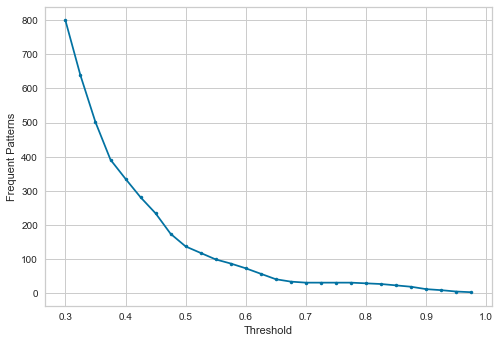

In [222]:
n_patterns = []
rango = np.arange(0.3, 1, 0.025)
for i in rango:
    pf = FP.apriori(mutual_songs_binarizado, min_support=i, use_colnames=True)
    l = len(pf)
    n_patterns.append(l)

plt.plot(rango, n_patterns, marker='.')    
plt.xlabel('Threshold')
plt.ylabel('Frequent Patterns')
plt.show()

In [227]:
pfMutualSongs = FP.apriori(mutual_songs_binarizado, min_support=0.30, use_colnames=True)
# pfMutualSongs
for pattern in pfMutualSongs.itemsets:
    if len(pattern) > 2:
        print(pattern)

frozenset({'acousticness_0.0', 'danceability_7.0', 'speechiness_-1.0'})
frozenset({'instrumentalness_0.0', 'danceability_7.0', 'speechiness_-1.0'})
frozenset({'danceability_7.0', 'speechiness_-1.0', 'liveness_0.0'})
frozenset({'danceability_7.0', 'speechiness_-1.0', 'time_signature_4'})
frozenset({'acousticness_0.0', 'danceability_7.0', 'instrumentalness_0.0'})
frozenset({'acousticness_0.0', 'danceability_7.0', 'liveness_0.0'})
frozenset({'acousticness_0.0', 'danceability_7.0', 'time_signature_4'})
frozenset({'instrumentalness_0.0', 'danceability_7.0', 'liveness_0.0'})
frozenset({'instrumentalness_0.0', 'danceability_7.0', 'time_signature_4'})
frozenset({'danceability_7.0', 'time_signature_4', 'liveness_0.0'})
frozenset({'loudness_-4000.0', 'acousticness_0.0', 'mode_0'})
frozenset({'loudness_-4000.0', 'instrumentalness_0.0', 'mode_0'})
frozenset({'loudness_-4000.0', 'mode_0', 'liveness_0.0'})
frozenset({'loudness_-4000.0', 'mode_0', 'time_signature_4'})
frozenset({'loudness_-4000.0', '

In [184]:
df_binarizado = pd.get_dummies(df, columns=df.columns, dtype = bool)
df_binarizado

,danceability_1.0,danceability_2.0,danceability_3.0,danceability_4.0,danceability_5.0,danceability_6.0,danceability_7.0,danceability_8.0,danceability_9.0,energy_1.0,...,song_language_8,song_language_9,song_language_10,song_language_11,song_language_12,song_language_13,song_language_14,label_1,label_2,label_3
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
997,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
998,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
999,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


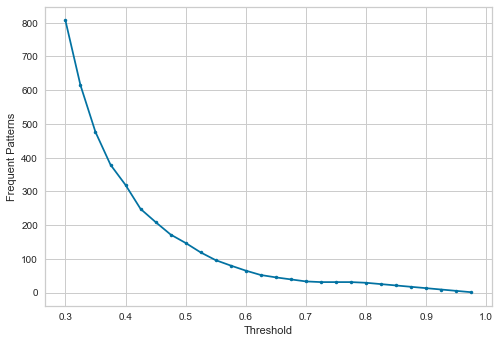

In [190]:
n_patterns = []
rango = np.arange(0.3, 1, 0.025)
for i in rango:
    pf = FP.apriori(df_binarizado, min_support=i, use_colnames=True)
    l = len(pf)
    n_patterns.append(l)

plt.plot(rango, n_patterns, marker='.')    
plt.xlabel('Threshold')
plt.ylabel('Frequent Patterns')
plt.show()

In [202]:
pfSongs = FP.apriori(df_binarizado, min_support=0.35, use_colnames=True)
for pattern in pfSongs.itemsets:
    if len(pattern) > 2:
        print(pattern)

iveness_0.0'})
frozenset({'instrumentalness_0.0', 'mode_1', 'liveness_0.0', 'time_signature_4'})
frozenset({'instrumentalness_0.0', 'song_language_1', 'mode_1', 'liveness_0.0'})
frozenset({'instrumentalness_0.0', 'mode_1', 'song_language_1', 'time_signature_4'})
frozenset({'mode_1', 'song_language_1', 'liveness_0.0', 'time_signature_4'})
frozenset({'acousticness_0.0', 'instrumentalness_0.0', 'speechiness_-1.0', 'liveness_0.0'})
frozenset({'duration_ms_3', 'instrumentalness_0.0', 'acousticness_0.0', 'speechiness_-1.0'})
frozenset({'acousticness_0.0', 'instrumentalness_0.0', 'speechiness_-1.0', 'time_signature_4'})
frozenset({'gender(of the atrist(s))_M', 'instrumentalness_0.0', 'acousticness_0.0', 'speechiness_-1.0'})
frozenset({'type(solo, colab, grpup/band)_3', 'instrumentalness_0.0', 'acousticness_0.0', 'speechiness_-1.0'})
frozenset({'number_integrants_1', 'instrumentalness_0.0', 'acousticness_0.0', 'speechiness_-1.0'})
frozenset({'acousticness_0.0', 'instrumentalness_0.0', 'song_la